<a href="https://colab.research.google.com/github/mikhail-karim/submission/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mikhail Shams Afzal Karim
- **Email:** mikhailsakarim@gmail.com
- **ID Dicoding:** mikhailkarim2004

## Menentukan Pertanyaan Bisnis

- Can a change or a shift in the current weather climate affect the current rate of bike sharing?
- How does the bike sharing usage perform during certain weather conditions that aren't too suitable for bike riding?
- How much of a difference is there between working days and holidays or weekends when it comes to bike sharing behavior?
- How does the bike sharing usage perform depending on the hours of the day?


## Import Semua Packages/Library yang Digunakan

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In this step, we will be importing two datasets from a github repository


In [267]:
# mengimport dataset harian dari repository github (day.csv)
day_df = pd.read_csv("https://raw.githubusercontent.com/mikhail-karim/submission/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [268]:
# mengimport dataset jam-an dari repository github (hour.csv)
hour_df = pd.read_csv("https://raw.githubusercontent.com/mikhail-karim/submission/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [269]:
# Check for missing values in the dataframe
missing_data = hour_df.isnull().sum()

# Display the count of missing values for each column
print(missing_data)


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- From the hour.csv dataset, we can see that a lot of the columns related to time are 0 since it's hour-based and not day-based.
- The day.csv doesn't have a "hour" column/attribute since each row counts as one day.

### Assessing Data

The first code snippet within the "Assessing Data" shows us the structure information of the .csv files

In [270]:
# mencari informasi tentang file dataset

day_df.info()
print("")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (to

Finding null variables a.k.a. variables that doesn't exist within the day.csv and hour.csv database

In [271]:
# apabila data ditemukan ada yang null, maka akan mencetak pesan kalau jumlah data null ada ___

if day_df.isnull() is True:
  print("Jumlah data yang ditemukan null: ", day_df.isnull().sum())
else:
  print("Jumlah data yang ditemukan null: 0")
print(" ")
day_df.isnull() #day.csv (harian)

Jumlah data yang ditemukan null: 0
 


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [272]:
# apabila data ditemukan ada yang null, maka akan mencetak pesan kalau jumlah data null ada ___

if hour_df.isnull() is True:
  print("Jumlah data yang ditemukan null: ", hour_df.isnull().sum())
else:
  print("Jumlah data yang ditemukan null: 0")
print(" ")
hour_df.isnull() #hour.csv (jam-an)

Jumlah data yang ditemukan null: 0
 


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17375,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Finding duplicated variables within the day.csv and hour.csv dataset

In [273]:
# apabila data ditemukan ada yang null, maka akan mencetak pesan kalau jumlah data null ada ___

if day_df.duplicated() is True:
  print("Jumlah data yang ditemukan duplikat: ", day_df.duplicated().sum())
else:
  print("Jumlah data yang ditemukan duplikat: 0")
print(" ")
day_df.duplicated() #day.csv (harian)

Jumlah data yang ditemukan duplikat: 0
 


,0
0,False
1,False
2,False
3,False
4,False
...,...
726,False
727,False
728,False
729,False


In [274]:
# apabila data ditemukan ada yang null, maka akan mencetak pesan kalau jumlah data null ada ___

if day_df.duplicated() is True:
  print("Jumlah data yang ditemukan duplikat: ", hour_df.duplicated().sum())
else:
  print("Jumlah data yang ditemukan duplikat: 0")
print(" ")
hour_df.duplicated() #hour.csv (jam-an)

Jumlah data yang ditemukan duplikat: 0
 


,0
0,False
1,False
2,False
3,False
4,False
...,...
17374,False
17375,False
17376,False
17377,False


Checking for any kind of inconsistencies within both of the datasets

In [275]:
# menggunakan fungsi .describe() untuk mempermudah pengecekan

day_df.describe() #day.csv (harian)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [276]:
# menggunakan fungsi .describe() untuk mempermudah pengecekan

hour_df.describe() #hour.csv (jam-an)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Throughout the data assessment stage on both datasets, there has been no indication of missing or duplicated or inconsistent values.
- The data type for "dteday" on day.csv is supposed to be datetime, and not object. Whereas on hour.csv, it has the correct data type.

### Cleaning Data

### Dataset Characteristics from the Readme.txt
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered\

Here's the initial table and structure information of the daily dataset (day.csv):

In [277]:
# menampilkan isi day.csv sebelum dibersihkan
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [278]:
# menampilkan informasi dari day.csv sebelum dibersihkan
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Changing the data type of "dteday" from being an object to being a datetime

In [279]:
# mengganti tipe data untuk kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Deleting unused columns

In [280]:
# dropping tiga kolom yang tidak akan digunakan
day_df = day_df.drop(['instant', 'holiday', 'windspeed'], axis=1)

Renaming some of the attributes or column names to make them more readable

In [281]:
# mengubah naman beberapa kolom agar lebih mudah dibaca
day_df = day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weekday' : 'day',
    'workingday': 'day_type',
    'weathersit': 'weather_type',
    'atemp': 'feels',
    'hum': 'humidity',
    'cnt': 'total'})

Renaming some of the values within certain colums to make them more readable

In [282]:
# mengubah nama-nama beberapa nilai/variable agar lebih mudah dibaca
day_df['season'] = day_df['season'].replace({1 : 'Spring', 2 : 'Summer', 3 : 'Fall', 4 : 'Winter'})
day_df['year'] = day_df['year'].replace({0 : 2011, 1 : 2012})
day_df['month'] = day_df['month'].replace({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})
day_df['day'] = day_df['day'].replace({0 :'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 :'Friday', 6 :'Saturday'})
day_df['day_type'] = day_df['day_type'].replace({0 : 'Working Day', 1 : 'Weekend'})
day_df['weather_type'] = day_df['weather_type'].replace({1 : 'Clear/Cloudy', 2 : 'Mist', 3 : 'Light Snow/Rain', 4 : 'Heavy Rain/Fog'})

Changing the data types of certain colums that has their values changed into strings

In [283]:
# mengubah tipe data untuk kolom yang variable nya diubah dari angka menjadi kata dari int64 menjadi string
day_df['season'] = day_df['season'].astype(str)
day_df['month'] = day_df['month'].astype(str)
day_df['day'] = day_df['day'].astype(str)
day_df['day_type'] = day_df['day_type'].astype(str)
day_df['weather_type'] = day_df['weather_type'].astype(str)

Here's the table and structure information of the daily dataset (day.csv) that has been cleaned:

In [284]:
# menampilkan isi day.csv setelah dibersihkan
day_df.head()

,date,season,year,month,day,day_type,weather_type,temp,feels,humidity,casual,registered,total
0,2011-01-01,Spring,2011,Jan,Saturday,Working Day,Mist,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,2011,Jan,Sunday,Working Day,Mist,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,2011,Jan,Monday,Weekend,Clear/Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,2011,Jan,Tuesday,Weekend,Clear/Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,2011,Jan,Wednesday,Weekend,Clear/Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [285]:
# menampilkan informasi dari day.csv sebelum dibersihkan
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          731 non-null    datetime64[ns]
 1   season        731 non-null    object        
 2   year          731 non-null    int64         
 3   month         731 non-null    object        
 4   day           731 non-null    object        
 5   day_type      731 non-null    object        
 6   weather_type  731 non-null    object        
 7   temp          731 non-null    float64       
 8   feels         731 non-null    float64       
 9   humidity      731 non-null    float64       
 10  casual        731 non-null    int64         
 11  registered    731 non-null    int64         
 12  total         731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 74.4+ KB


---

Doing the same data cleaning process for the hourly database (hour.csv):

In [286]:
# mengganti tipe data untuk kolom 'dteday' menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# dropping tiga kolom yang tidak akan digunakan
hour_df = hour_df.drop(['instant', 'holiday', 'windspeed'], axis=1)

# mengubah naman beberapa kolom agar lebih mudah dibaca
hour_df = hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr' : 'hour',
    'weekday' : 'day',
    'workingday': 'day_type',
    'weathersit': 'weather_type',
    'atemp': 'feels',
    'hum': 'humidity',
    'cnt': 'total'})

# mengubah nama-nama beberapa nilai/variable agar lebih mudah dibaca
hour_df['season'] = hour_df['season'].replace({1 : 'Spring', 2 : 'Summer', 3 : 'Fall', 4 : 'Winter'})
hour_df['year'] = hour_df['year'].replace({0 : 2011, 1 : 2012})
hour_df['month'] = hour_df['month'].replace({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})
hour_df['day'] = hour_df['day'].replace({0 :'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 :'Friday', 6 :'Saturday'})
hour_df['day_type'] = hour_df['day_type'].replace({0 : 'Working Day', 1 : 'Weekend'})
hour_df['weather_type'] = hour_df['weather_type'].replace({1 : 'Clear/Cloudy', 2 : 'Mist', 3 : 'Light Snow/Rain', 4 : 'Heavy Rain/Fog'})

# mengubah tipe data untuk kolom yang variable nya diubah dari angka menjadi kata dari int64 menjadi string
hour_df['season'] = hour_df['season'].astype(str)
hour_df['month'] = hour_df['month'].astype(str)
hour_df['day'] = hour_df['day'].astype(str)
hour_df['day_type'] = hour_df['day_type'].astype(str)
hour_df['weather_type'] = hour_df['weather_type'].astype(str)

In [287]:
# menampilkan isi day.csv setelah dibersihkan
hour_df.head()

,date,season,year,month,hour,day,day_type,weather_type,temp,feels,humidity,casual,registered,total
0,2011-01-01,Spring,2011,Jan,0,Saturday,Working Day,Clear/Cloudy,0.24,0.2879,0.81,3,13,16
1,2011-01-01,Spring,2011,Jan,1,Saturday,Working Day,Clear/Cloudy,0.22,0.2727,0.80,8,32,40
2,2011-01-01,Spring,2011,Jan,2,Saturday,Working Day,Clear/Cloudy,0.22,0.2727,0.80,5,27,32
3,2011-01-01,Spring,2011,Jan,3,Saturday,Working Day,Clear/Cloudy,0.24,0.2879,0.75,3,10,13
4,2011-01-01,Spring,2011,Jan,4,Saturday,Working Day,Clear/Cloudy,0.24,0.2879,0.75,0,1,1


In [288]:
# menampilkan informasi dari day.csv sebelum dibersihkan
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          17379 non-null  datetime64[ns]
 1   season        17379 non-null  object        
 2   year          17379 non-null  int64         
 3   month         17379 non-null  object        
 4   hour          17379 non-null  int64         
 5   day           17379 non-null  object        
 6   day_type      17379 non-null  object        
 7   weather_type  17379 non-null  object        
 8   temp          17379 non-null  float64       
 9   feels         17379 non-null  float64       
 10  humidity      17379 non-null  float64       
 11  casual        17379 non-null  int64         
 12  registered    17379 non-null  int64         
 13  total         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 1.9+ MB


**Here are some insights made after completing the process of data wrangling:**
- Most of the column names are found to be hard to read before the cleaning process
- A lot of the values had to be changed. For example, the weather data has been changed from initially 1, 2, 3, and 4 to represent each weather condition to strings that represent the data (1 means Clear/Cloudy, 2 means Mist, 3 means Light Snow or Rain, and 4 means Heavy Rain or Fog)
- The data type for date was initally an object in both the daily and hourly dataset. And while 'object' is a general type, it's best to change the dates into datetime.
- The values within 'temp' and 'feels' column have been normalized to a range of 0 to 1 in the inital dataset to make it easier for machine learning algorithms.

## Exploratory Data Analysis (EDA)

### Explore ...

Bike Sharing rate based on weather condition

In [289]:
# menampilkan data pengguna bike sharing berdasarkan jenis cuaca
day_df.groupby('weather_type').agg({
    'casual' : ['max', 'min', 'sum'],
    'registered' : ['max', 'min', 'sum'],
    'total' : ['max', 'min', 'sum']
})

casual             registered               total       \
                   max min     sum        max  min      sum   max  min   
weather_type                                                             
Clear/Cloudy      3410  15  446346       6946  416  1811606  8714  431   
Light Snow/Rain   1264   2    3895       4324   20    33974  4639   22   
Mist              3155   9  169776       6844  491   827082  8362  605   

                          
                     sum  
weather_type              
Clear/Cloudy     2257952  
Light Snow/Rain    37869  
Mist              996858

Bike Sharing rate based on weather condition (using the other dataset)

In [290]:
# menampilkan data pengguna bike sharing berdasarkan jenis cuaca
hour_df.groupby('weather_type').agg({
    'casual' : ['max', 'min', 'sum'],
    'registered' : ['max', 'min', 'sum'],
    'total' : ['max', 'min', 'sum']
})

casual             registered              total             
                   max min     sum        max min      sum   max min      sum
weather_type                                                                 
Clear/Cloudy       367   0  462745        886   0  1875428   977   1  2338173
Heavy Rain/Fog       6   1       8        158  22      215   164  23      223
Light Snow/Rain    263   0   22783        791   0   135548   891   1   158331
Mist               350   0  134481        822   0   661471   957   1   795952

Bike Sharing rate based on the day of the week

In [291]:
# menampilkan data pengguna bike sharing berdasarkan hari
day_df.groupby('day').agg({
    'date' : ['nunique'],
    'casual' : ['max', 'min', 'sum', 'mean'],
    'registered' : ['max', 'min', 'sum', 'mean'],
    'total' : ['max', 'min', 'sum', 'mean', 'std']
}).sort_values([('total', 'sum')], ascending = False)

date casual                          registered                \
          nunique    max min     sum         mean        max   min     sum   
day                                                                          
Friday        104   2469  38   78238   752.288462       6917  1129  409552   
Thursday      104   1405  15   61460   590.961538       6781   416  423935   
Saturday      105   3410  57  153852  1465.257143       5966   570  323955   
Wednesday     104   2562   9   57319   551.144231       6946   432  415729   
Tuesday       104   1348   9   57843   556.182692       6697   573  411266   
Monday        105   3065   2   70784   674.133333       6435    20  384719   
Sunday        105   3283  54  140521  1338.295238       5657   451  303506   

                       total                                          
                  mean   max   min     sum         mean          std  
day                                                                   
Friday     3938.000000  8362  1167  487790  4690.288462  1874.624870  
Thursday   4076.298077  7804   431  485395  4667.259615  1939.433317  
Saturday   3085.285714  8714   627  477807  4550.542857  2196.693009  
Wednesday  3997.394231  8173   441  473048  4548.538462  2038.095884  
Tuesday    3954.480769  7767   683  469109  4510.663462  1826.911642  
Monday     3663.990476  7525    22  455503  4338.123810  1793.074013  
Sunday     2890.533333  8227   605  444027  4228.828571  1872.496629

Bike Sharing rate based on the hour of the day

In [292]:
# menampilkan data pengguna bike sharing berdasarkan jam
hour_df.groupby('hour').agg({
    'casual' : ['max', 'min', 'sum'],
    'registered' : ['max', 'min', 'sum'],
    'total' : ['max', 'min', 'sum', 'mean', 'std']
})

casual            registered             total                          \
        max min    sum        max min     sum   max min     sum        mean   
hour                                                                          
0        68   0   7375        234   0   31755   283   2   39130   53.898072   
1        49   0   4709        139   0   19455   168   1   24164   33.375691   
2        44   0   3412        104   0   12940   132   1   16352   22.869930   
3        26   0   1893         61   0    6281    79   1    8174   11.727403   
4        13   0    874         22   0    3554    28   1    4428    6.352941   
5        16   0   1012         64   0   13249    66   1   14261   19.889819   
6        19   0   3017        203   0   52115   213   1   55132   76.044138   
7        40   0   8037        572   1  146134   596   1  154171  212.064649   
8        69   0  15761        808   4  245240   839   5  261001  359.011004   
9       142   0  22458        399   6  136980   426  14  159438  219.309491   
10      209   0  33789        351   8   92468   539   8  126257  173.668501   
11      268   0  43286        446   5  108034   663  10  151320  208.143054   
12      362   0  49718        526   3  134696   776   3  184414  253.315934   
13      355   0  52713        491   9  132206   760  11  184919  253.661180   
14      361   0  55089        502  12  120563   750  12  175652  240.949246   
15      357   0  54606        456   4  128543   750   7  183149  251.233196   
16      367   0  53834        481   8  173914   783  11  227748  311.983562   
17      347   0  54220        885  14  282640   976  15  336860  461.452055   
18      266   0  44496        886  20  265276   977  23  309772  425.510989   
19      230   0  35505        662  11  191284   743  11  226789  311.523352   
20      237   0  26378        461   8  138172   567  11  164550  226.030220   
21      222   0  20570        362   6  104875   584   6  125445  172.314560   
22      175   0  16200        327   5   79412   502   9   95612  131.335165   
23       71   0  11065        220   2   52876   256   2   63941   87.831044   

                  
             std  
hour              
0      42.307910  
1      33.538727  
2      26.578642  
3      13.239190  
4       4.143818  
5      13.200765  
6      55.084348  
7     161.441936  
8     235.189285  
9      93.703458  
10    102.205413  
11    127.495536  
12    145.081134  
13    148.107657  
14    147.271574  
15    144.632541  
16    148.682618  
17    232.656611  
18    224.639304  
19    161.050359  
20    119.670164  
21     89.788893  
22     69.937782  
23     50.846889

Bike Sharing rate based on the season

In [293]:
# menampilkan data pengguna bike sharing berdasarkan musim
day_df.groupby(by = ['season']).agg({
    'casual' : ['max', 'min', 'sum'],
    'registered' : ['max', 'min', 'sum'],
    'total' : ['max', 'min', 'sum', 'mean', 'std']
})

casual              registered              total                 \
          max  min     sum        max  min     sum   max   min      sum   
season                                                                    
Fall     3160  118  226091       6917  889  835038  8714  1115  1061129   
Spring   3155    9   60622       5315  416  410726  7836   431   471348   
Summer   3410  120  203522       6456  674  715067  8362   795   918589   
Winter   3031    2  129782       6946   20  711831  8555    22   841613   

                                  
               mean          std  
season                            
Fall    5644.303191  1459.800381  
Spring  2604.132597  1399.942119  
Summer  4992.331522  1695.977235  
Winter  4728.162921  1699.615261

Bike Sharing rate based on the type of day

In [294]:
# menampilkan data pengguna bike sharing berdasarkan tipe hari
day_df.groupby(by = ['day_type']).agg({
    'casual' : ['max', 'min', 'sum'],
    'registered' : ['max', 'min', 'sum'],
    'total' : ['max', 'min', 'sum', 'mean', 'std']
})

casual             registered               total                \
               max min     sum        max  min      sum   max  min      sum   
day_type                                                                      
Weekend       2469   2  303285       6946   20  1989125  8362   22  2292410   
Working Day   3410  54  316732       5966  451   683537  8714  605  1000269   

                                       
                    mean          std  
day_type                               
Weekend      4584.820000  1878.415583  
Working Day  4330.168831  2052.141245

Bike Sharing rate based on the season and weather condition

In [295]:
# menampilkan data pengguna bike sharing berdasarkan musim dan jenis cuaca
day_df.groupby(by = ['season', 'weather_type']).agg({
    'date' : ['nunique'],
    'casual' : ['max', 'min', 'sum'],
    'registered' : ['max', 'min', 'sum'],
    'total' : ['max', 'min', 'sum', 'mean', 'std']
})

date casual              registered                \
                       nunique    max  min     sum        max   min     sum   
season weather_type                                                           
Fall   Clear/Cloudy        136   3160  562  167945       6917  2298  631498   
       Light Snow/Rain       4   1264  118    1739       3195  1689    9268   
       Mist                 48   3065  226   56407       6271   889  194272   
Spring Clear/Cloudy        111   1658   15   41562       5315   416  270474   
       Light Snow/Rain       4    192    9     281       1977   432    3458   
       Mist                 66   3155    9   18779       4681   491  136794   
Summer Clear/Cloudy        113   3410  222  146388       6456  1515  480598   
       Light Snow/Rain       3    179  120     420       1506   674    3087   
       Mist                 68   2496  166   56714       6110  1221  231382   
Winter Clear/Cloudy        103   3031  143   90451       6946   935  429036   
       Light Snow/Rain      10    315    2    1455       4324    20   18161   
       Mist                 65   2643   87   37876       6844  1009  264634   

                       total                                          
                         max   min     sum         mean          std  
season weather_type                                                   
Fall   Clear/Cloudy     8714  3285  799443  5878.257353  1356.647125  
       Light Snow/Rain  4459  1842   11007  2751.750000  1199.339923  
       Mist             7582  1115  250679  5222.479167  1431.160502  
Spring Clear/Cloudy     6312   431  312036  2811.135135  1409.960622  
       Light Snow/Rain  2169   441    3739   934.750000   826.272100  
       Mist             7836   605  155573  2357.166667  1313.332082  
Summer Clear/Cloudy     8294  2028  626986  5548.548673  1467.655078  
       Light Snow/Rain  1685   795    3507  1169.000000   461.679543  
       Mist             8362  1471  288096  4236.705882  1579.038070  
Winter Clear/Cloudy     8555  1495  519487  5043.563107  1595.693909  
       Light Snow/Rain  4639    22   19616  1961.600000  1329.287378  
       Mist             7852  1096  302510  4654.000000  1523.445365

Bike Sharing rate based on the type of day and weather condition

In [296]:
# menampilkan data pengguna bike sharing berdasarkan tipe hari dan jenis cuaca
day_df.groupby(by = ['day_type', 'weather_type']).agg({
    'date' : ['nunique'],
    'casual' : ['max', 'min', 'sum'],
    'registered' : ['max', 'min', 'sum'],
    'total' : ['max', 'min', 'sum', 'mean', 'std']
})

date casual             registered       \
                            nunique    max min     sum        max  min   
day_type    weather_type                                                 
Weekend     Clear/Cloudy        307   1807  15  214877       6946  416   
            Light Snow/Rain      16    315   2    2141       4324   20   
            Mist                177   2469   9   86267       6844  674   
Working Day Clear/Cloudy        156   3410  54  231469       5966  451   
            Light Snow/Rain       5   1264  57    1754       3195  570   
            Mist                 70   3155  67   83509       5209  491   

                                     total                             \
                                 sum   max  min      sum         mean   
day_type    weather_type                                                
Weekend     Clear/Cloudy     1327461  8173  431  1542338  5023.902280   
            Light Snow/Rain    26651  4639   22    28792  1799.500000   
            Mist              635013  8362  683   721280  4075.028249   
Working Day Clear/Cloudy      484145  8714  754   715614  4587.269231   
            Light Snow/Rain     7323  4459  627     9077  1815.400000   
            Mist              192069  7852  605   275578  3936.828571   

                                          
                                     std  
day_type    weather_type                  
Weekend     Clear/Cloudy     1773.485099  
            Light Snow/Rain  1171.221812  
            Mist             1765.122364  
Working Day Clear/Cloudy     2047.547484  
            Light Snow/Rain  1595.990226  
            Mist             1925.475601

Bike Sharing rate based on the type of day and the hour of the day

In [297]:
# menampilkan data pengguna bike sharing berdasarkan tipe hari dan jam
hour_df.groupby(by = ['day_type', 'hour']).agg({
    'casual' : ['max', 'min', 'sum'],
    'registered' : ['max', 'min', 'sum'],
    'total' : ['max', 'min', 'sum', 'mean', 'std']
})

casual            registered             total              \
                    max min    sum        max min     sum   max min     sum   
day_type    hour                                                              
Weekend     0        68   0   3546        234   0   14700   283   2   18246   
            1        41   0   1833         86   0    6344   114   1    8177   
            2        17   0   1041         68   0    3188    74   1    4229   
            3        17   0    428         29   0    1895    36   1    2323   
            4        11   0    360         14   0    2192    17   1    2552   
            5        10   0    629         64   1   11703    66   1   12332   
            6        19   0   2142        203   7   48698   213   7   50840   
            7        40   0   6049        572  15  138095   596  18  144144   
            8        55   0  11043        808  31  225552   839  31  236595   
            9        75   0  12059        399  22  107734   426  23  119793   
            10      125   0  15478        200   8   51664   275   8   67142   
            11      131   0  18649        252   5   59833   361  10   78482   
            12      199   0  20555        312   3   79253   471   3   99808   
            13      224   0  21199        316   9   77619   428  11   98818   
            14      240   0  22843        502  12   68576   651  12   91419   
            15      233   0  23074        423  11   77189   601  13  100263   
            16      219   0  24124        481  13  122144   634  13  146268   
            17      264   0  28391        885  19  233729   976  26  262120   
            18      237   0  25125        886  20  220004   977  26  245129   
            19      213   0  20429        662  14  153075   743  18  173504   
            20      117   0  15622        461  17  108738   567  23  124360   
            21       91   0  12256        330   6   80515   398   6   92771   
            22       79   0   9747        262   5   59171   321  11   68918   
            23       58   0   6663        220   8   37514   256   9   44177   
Working Day 0        63   0   3829        218   4   17055   249   6   20884   
            1        49   0   2876        139   2   13111   168   4   15987   
            2        44   0   2371        104   2    9752   132   2   12123   
            3        26   0   1465         61   2    4386    79   2    5851   
            4        13   0    514         22   0    1362    28   1    1876   
            5        16   0    383         39   0    1546    55   1    1929   
            6        17   0    875        123   0    3417   133   1    4292   
            7        35   0   1988        367   1    8039   387   1   10027   
            8        69   0   4718        549   4   19688   597   5   24406   
            9       142   0  10399        337   6   29246   397  14   39645   
            10      209   0  18311        351  12   40804   539  12   59115   
            11      268   1  24637        446  26   48201   663  27   72838   
            12      362   4  29163        526  26   55443   776  32   84606   
            13      355   0  31514        491  30   54587   760  30   86101   
            14      361   0  32246        448  19   51987   750  23   84233   
            15      357   0  31532        456   4   51354   750   7   82886   
            16      367   3  29710        473   8   51770   783  11   81480   
            17      347   1  25829        601  14   48911   731  15   74740   
            18      266   0  19371        589  23   45272   676  23   64643   
            19      230   0  15076        461  11   38209   554  11   53285   
            20      237   0  10756        327   8   29434   551  11   40190   
            21      222   0   8314        362   6   24360   584   7   32674   
            22      175   0   6453        327   9   20241   502   9   26694   
            23       71   0   4402        185   2   15362   239   2

Seasonal climat rate (temperature, feel of the temperature, and humidity) normalized to a range of 0 and 1. Note that the both temperatures are in celsius.

In [298]:
# menampilkan data suhu dan kelembapan berdasarkan musim
day_df.groupby('season').agg({
    'temp' : ['min', 'max', 'mean'],
    'feels' : ['min', 'max', 'mean'],
    'humidity' : ['min', 'max', 'mean']
})

temp                         feels                      humidity  \
             min       max      mean       min       max      mean       min   
season                                                                         
Fall    0.469167  0.861667  0.706309  0.242400  0.840896  0.655898  0.360000   
Spring  0.059130  0.572500  0.297748  0.079070  0.548617  0.296914  0.000000   
Summer  0.253043  0.808333  0.544405  0.250339  0.757579  0.520307  0.254167   
Winter  0.220833  0.657500  0.422906  0.227913  0.607975  0.415539  0.333478   

                            
             max      mean  
season                      
Fall    0.939565  0.633482  
Spring  0.948261  0.582903  
Summer  0.922500  0.626948  
Winter  0.972500  0.668719

Seasonal climate rate that has been un-normalized to be more readable in celsius.

In [299]:
# menampilkan data suhu dan kelembapan berdasarkan musim (di non-normalisasikan)
day_df['normal_temp'] = day_df['temp'] * 41
day_df['normal_feels'] = day_df['feels'] * 50
day_df['normal_humidity'] = day_df['humidity'] * 100

day_df.groupby('season').agg({
    'normal_temp' : ['min', 'max', 'mean'],
    'normal_feels' : ['min', 'max', 'mean'],
    'normal_humidity' : ['min', 'max', 'mean']
}).round(2)

normal_temp               normal_feels               normal_humidity  \
               min    max   mean          min    max   mean             min   
season                                                                        
Fall         19.24  35.33  28.96        12.12  42.04  32.79           36.00   
Spring        2.42  23.47  12.21         3.95  27.43  14.85            0.00   
Summer       10.37  33.14  22.32        12.52  37.88  26.02           25.42   
Winter        9.05  26.96  17.34        11.40  30.40  20.78           33.35   

                      
          max   mean  
season                
Fall    93.96  63.35  
Spring  94.83  58.29  
Summer  92.25  62.69  
Winter  97.25  66.87

Bike Sharing rate and climate rate based on the day of the week

In [300]:
# menampilkan data pengguna bike sharing dan data suhu berdasarkan hari
day_df.groupby('day').agg({
    'normal_temp' : ['min', 'max', 'mean'],
    'normal_feels' : ['min', 'max', 'mean'],
    'normal_humidity' : ['min', 'max', 'mean'],
    'casual' : ['max', 'min', 'sum'],
    'registered' : ['max', 'min', 'sum'],
    'total' : ['max', 'min', 'sum']
}).round(2)

normal_temp               normal_feels                \
                  min    max   mean          min    max   mean   
day                                                              
Friday           6.60  34.78  20.32         7.89  42.04  23.56   
Monday           3.99  32.05  20.23         5.90  36.49  23.73   
Saturday         2.42  35.33  19.76         3.95  40.25  23.10   
Sunday           3.96  34.03  19.83         4.94  39.74  23.26   
Thursday         5.92  33.93  20.68         7.48  41.32  24.14   
Tuesday          6.15  33.55  20.68         6.31  37.78  24.17   
Wednesday        4.41  32.53  20.69         5.97  37.34  24.08   

          normal_humidity               casual             registered        \
                      min    max   mean    max min     sum        max   min   
day                                                                           
Friday              35.42  97.25  61.38   2469  38   78238       6917  1129   
Monday              30.22  92.50  63.76   3065   2   70784       6435    20   
Saturday            18.79  92.92  61.96   3410  57  153852       5966   570   
Sunday              27.58  94.83  62.77   3283  54  140521       5657   451   
Thursday             0.00  93.96  60.95   1405  15   61460       6781   416   
Tuesday             29.00  96.25  64.18   1348   9   57843       6697   573   
Wednesday           36.00  97.04  64.54   2562   9   57319       6946   432   

                  total                
              sum   max   min     sum  
day                                    
Friday     409552  8362  1167  487790  
Monday     384719  7525    22  455503  
Saturday   323955  8714   627  477807  
Sunday     303506  8227   605  444027  
Thursday   423935  7804   431  485395  
Tuesday    411266  7767   683  469109  
Wednesday  415729  8173   441  473048

**A couple of interesting points found while doing the explanatory data analysis:**
- (Please note that I will refer to the unit of bikes being shared as "rented")
- Bikes are most rented while the weather condition is either clear or cloudy. Whereas in an unsupporting weather condition such as heavy rain, bikes saw the smallest amount of rent.
- Friday saw the most amount of bikes rented at 487,790, but the figures aren't too far off from the least amount of bikes rented seen on Sunday at just 444,027.
- While Friday saw the most amount of bikes rented at a daily basis, on an hourly basis, 5p.m. sees the most amount at 336,860.
- Fall saw the most amount of bikes rented out of the four seasons at 1,061,129, while spring sees the least at just 471,348.
- People much prefer to rent bikes on the Weekend than on Working Days/Weekdays, at 2,292,410 (just under three million) compared to 1,000,269 on Working Days.
- Fall also saw both the hottest temperature and feels-like temperature on average, at 28.96°C and 32.79°C. Winter saw the most amount of humidity on air at 66.87g/m3.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Can a change or a shift in the current weather climate affect the current rate of bike sharing?

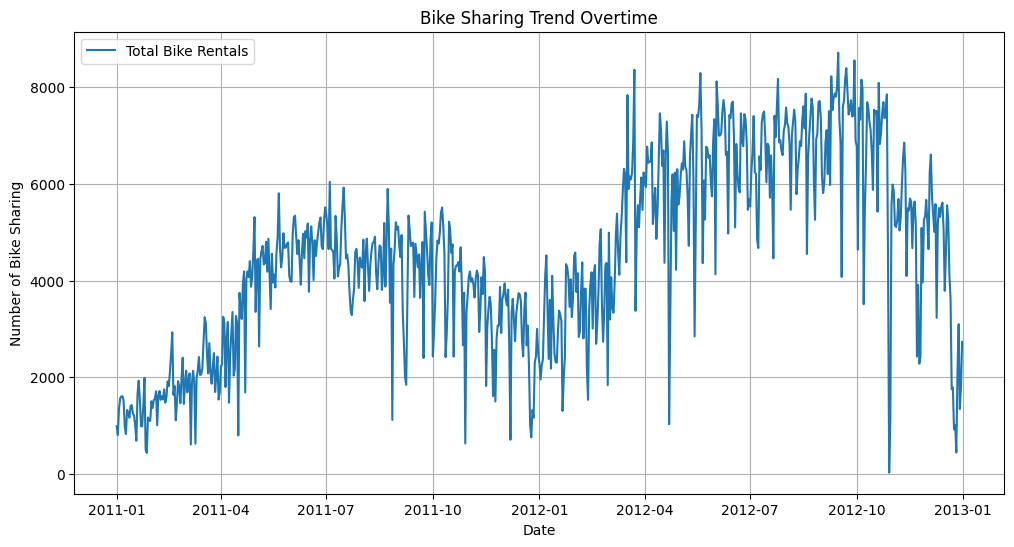

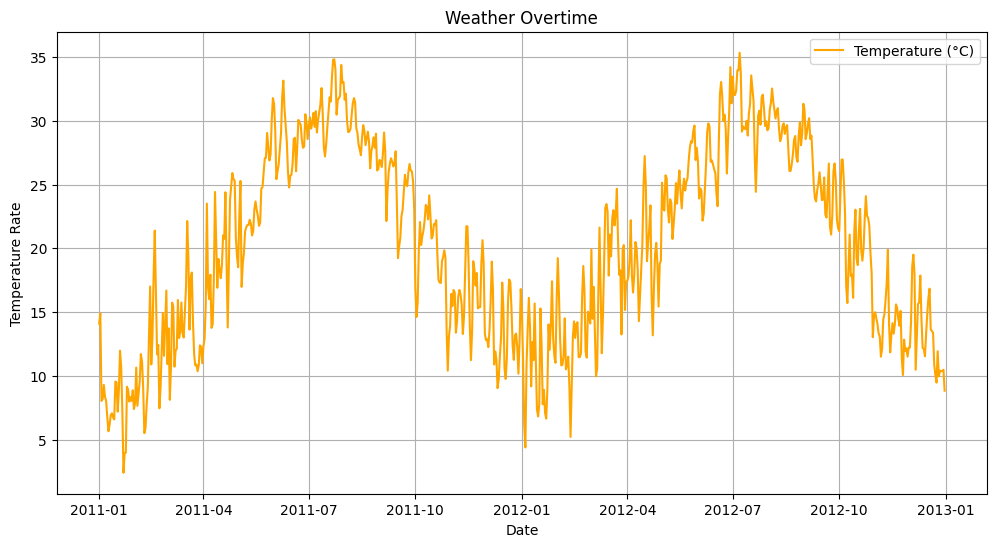

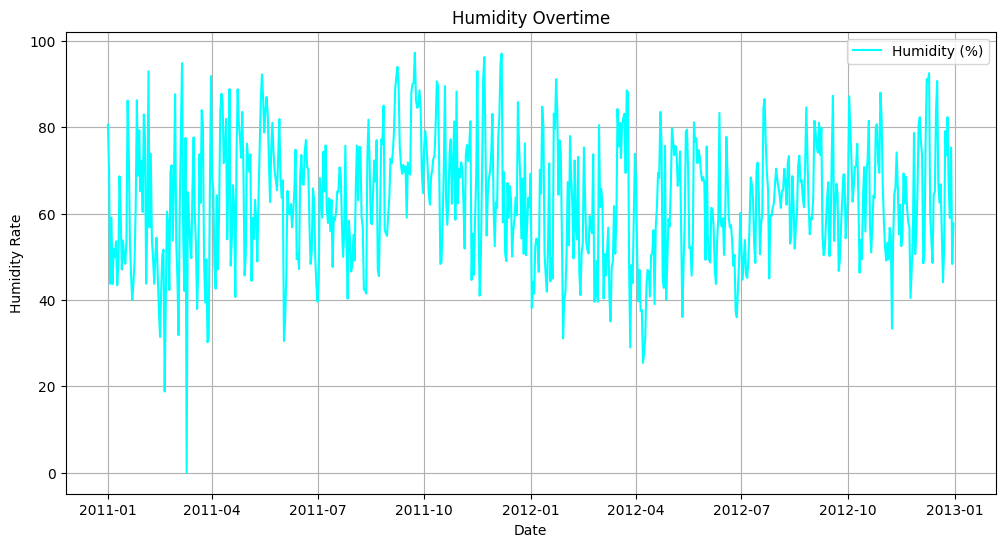

In [301]:
# membuat line chart untuk jumlah bike sharing
plt.figure(figsize=(12, 6))
plt.plot(day_df['date'], day_df['total'], label='Total Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Number of Bike Sharing')
plt.title('Bike Sharing Trend Overtime')
plt.legend()
plt.grid(True)
plt.show()

print(" ")

# membuat line chart untuk suhu
plt.figure(figsize=(12, 6))
plt.plot(day_df['date'], day_df['normal_temp'], label='Temperature (°C)', color = 'orange')
plt.xlabel('Date')
plt.ylabel('Temperature Rate')
plt.title('Weather Overtime')
plt.legend()
plt.grid(True)
plt.show()

print(" ")

# membuat line chart untuk kelembapan
plt.figure(figsize=(12, 6))
plt.plot(day_df['date'], day_df['normal_humidity'], label='Humidity (%)', color = 'cyan')
plt.xlabel('Date')
plt.ylabel('Humidity Rate')
plt.title('Humidity Overtime')
plt.legend()
plt.grid(True)
plt.show()


### Pertanyaan 2:

How does the bike sharing business perform during certain weather conditions that aren't too suitable for bike riding?

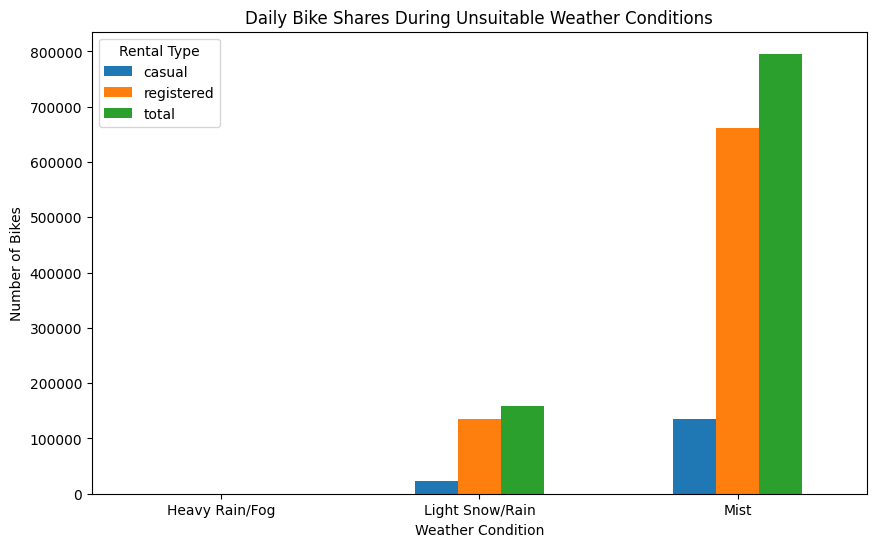

In [302]:
# membuat bar chart untuk ketinga jenis cuaca yang tidak mendukung (cuaca selain cerah/berawan)
weather_conditions = ['Mist', 'Light Snow/Rain', 'Heavy Rain/Fog']
rental_data = hour_df[hour_df['weather_type'].isin(weather_conditions)].groupby('weather_type').agg({
    'casual': 'sum',
    'registered': 'sum',
    'total': 'sum'
})

ax = rental_data.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Number of Bikes')
ax.set_title('Daily Bike Shares During Unsuitable Weather Conditions')
plt.xticks(rotation=0)
plt.legend(title='Rental Type')
plt.show()


### Pertanyaan 3:

How much of a difference is there between working days and holidays or weekends when it comes to bike sharing behavior?

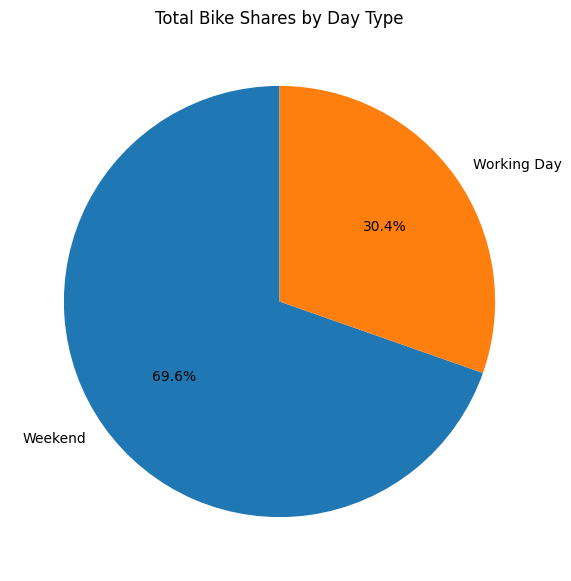

In [303]:
# membuat pie chart untuk persentase jumlah pengguna bike sharing dalam hari kerja/akhir pekan
day_type_totals = day_df.groupby('day_type')['total'].sum()

plt.figure(figsize=(7, 7))
plt.pie(day_type_totals, labels=day_type_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Bike Shares by Day Type')
plt.show()


### Pertanyaan 4:

How does the bike sharing usage perform depending on the hours of the day?

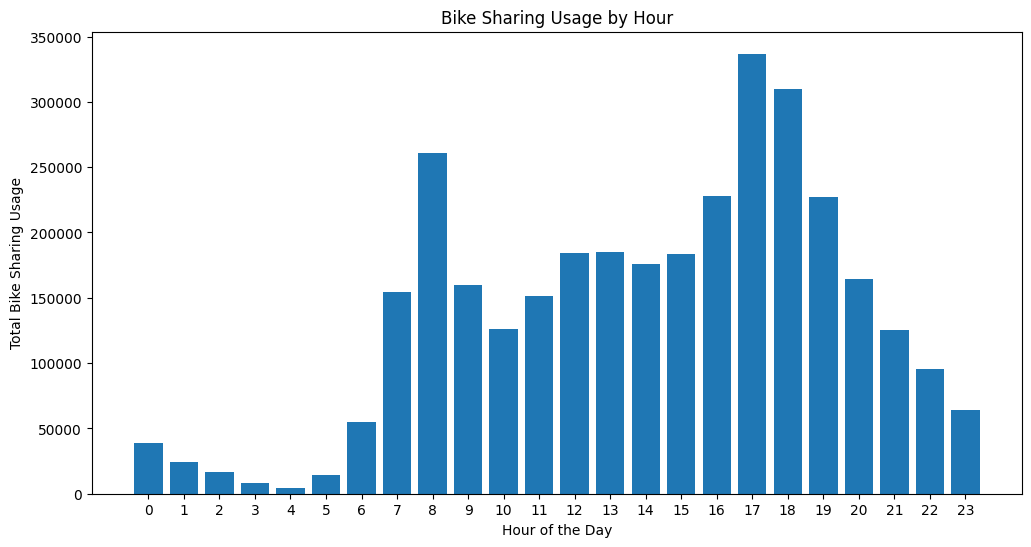

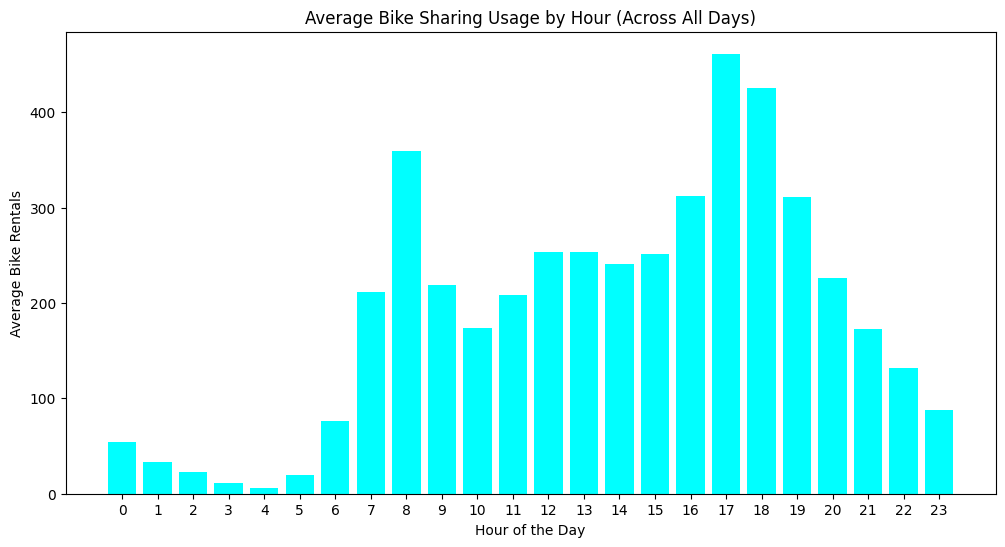

In [304]:
# jumlah total sewa berdasarkan jam
hourly_totals = hour_df.groupby('hour')['total'].sum()

# membuat line chart untuk jumlah sewa
plt.figure(figsize=(12, 6))
plt.bar(hourly_totals.index, hourly_totals.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Sharing Usage')
plt.title('Bike Sharing Usage by Hour')
plt.xticks(range(24))
plt.show()

print(" ")

# jumlah total sewa berdasarkan jam
average_hourly_rentals = hour_df.groupby('hour')['total'].mean()

# membuat line chart untuk jumlah sewa
plt.figure(figsize=(12, 6))
plt.bar(average_hourly_rentals.index, average_hourly_rentals.values, color = "cyan")
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Sharing Usage by Hour (Across All Days)')
plt.xticks(range(24))
plt.show()


**A couple of interesting findings from the charts:**
- Based on each of the line graphs that shows the rate of bike sharing usage, the tempature, and the humidity over the course of two years (2011-2012), it can be concluded that the weather conditions barely have an effect, if any, to how many people prefer using bike sharing.
- Based on the bar chart that shows the rate of bike sharing usage during unsuitable weather conditions such as mist; light rain/snow; and heavy rain/fog, it can also be concluded that bike sharing still sees a lot of usage during misty weather conditons. However, during either kinds of storm, the bike sharing usage rate drops significantly.
- The pie chart shows that more people use bike sharing during the holidays or weekends compared to working days. This can be an indication that people use bike sharing for leisure or recreational activities.
- Based on the bar chart that shows the rate of bike sharing usage by the hour, evening hours saw the most amount of bike sharing usage compared to other parts of the day.

## Analisis Lanjutan (Opsional)

A clustering technique with a manual grouping method is used in analyzing and grouping the total amount of both casual and registered users throuout the month. Each month gets grouped into three categories which are high, medium, and low.

In [305]:
# menampilkan data jumlah rata-rata pengguna bike sharing berdasarkan bulan
day_df.groupby(by = ['month']).agg({
    'casual' : ['sum'],
    'registered' : ['sum'],
    'total' : ['sum']
}).sort_values([('total', 'sum')], ascending = False)

,casual,registered,total
,sum,sum,sum
month,,,
Aug,72039,279155,351194
Jun,73906,272436,346342
Sep,70323,275668,345991
Jul,78157,266791,344948
May,75285,256401,331686
Oct,59760,262592,322352
Apr,60802,208292,269094
Nov,36603,218228,254831


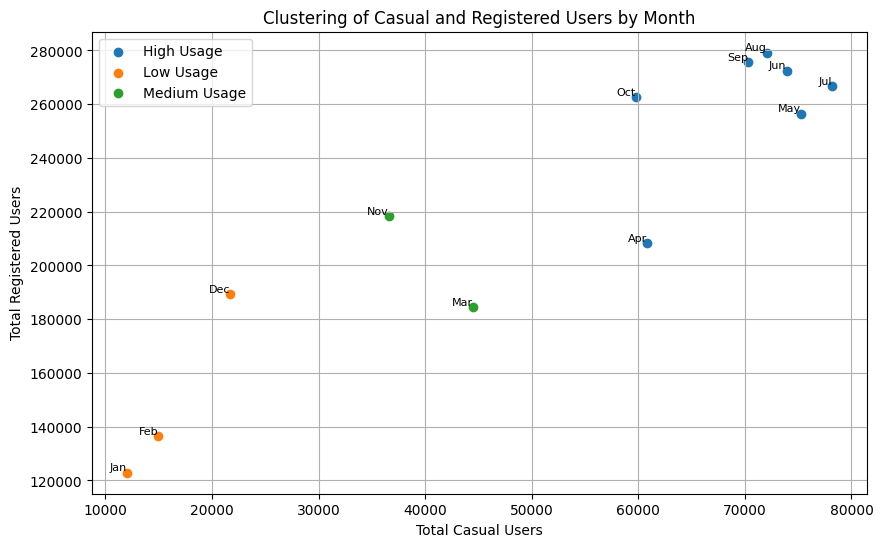

In [306]:
def casual_and_registered(df, low_threshold=(30000, 200000), medium_threshold=(50000, 300000)):
    required_columns = {'month', 'casual', 'registered'}
  # Grouping data bedasarkan bulan dan menggabungkan kolom casual dan registered (hanya tampilkan sum)
    monthly_data = df.groupby('month').agg({'casual': 'sum', 'registered': 'sum'})

    clusters = {}
    low_casual, low_registered = low_threshold
    med_casual, med_registered = medium_threshold

  # klasifikasikan bulan menjadi 3 cluster berbeda berdasarkan jumlah casual dan jumlah registered
    for month, row in monthly_data.iterrows():
        casual = row['casual']
        registered = row['registered']

        if casual < low_casual and registered < low_registered:
            cluster_name = 'Low Usage'
        elif casual < med_casual and registered < med_registered:
            cluster_name = 'Medium Usage'
        else:
            cluster_name = 'High Usage'

        if cluster_name not in clusters:
            clusters[cluster_name] = []
        clusters[cluster_name].append((casual, registered, month))

    plt.figure(figsize=(10, 6))

    num_clusters = len(clusters)

    for i, (cluster_name, dots) in enumerate(clusters.items()):
        x_values = [point[0] for point in dots]
        y_values = [point[1] for point in dots]
        month_labels = [point[2] for point in dots]

        plt.scatter(x_values, y_values, label=cluster_name)

      # memberi titik data label masing-masing
        for j, month in enumerate(month_labels):
            plt.text(x_values[j], y_values[j], month, fontsize=8, ha='right', va='bottom')

    plt.xlabel('Total Casual Users')
    plt.ylabel('Total Registered Users')
    plt.title('Clustering of Casual and Registered Users by Month')
    plt.legend()
    plt.grid(True)
    plt.show()

casual_and_registered(hour_df, low_threshold=(30000, 200000), medium_threshold=(50000, 300000))


## Conclusion

- Conclusion of the 1st question:
> With all three line charts showing the rate of bike sharing and weather conditions, it's clear that the changes in temperature and humidity does not have any significant impact on bike sharing rates. In the summer months of 2011 where the temperatures ranged between 30 to 35 degree celsius, bike sharing rates ranged between 4000 and 6000. Next year saw a higher range of 4000 to 8000 during the same summer months.

- Conclusion of the 2nd question:
> The clear/cloudy weather clearly sees the most amount of bike sharing out of the four weather categories. In the bar chart that shows the rate of bike sharing based on three ohter weather categories (Mist, Light Rain/Snow, Heavy Rain/Fog), the chart shows that a lot of people still uses bike sharing during misty weather. However, the same cannot be said for stormy weather of any kind, since they both saw significant drop in bike sharing compared to non-stormy weather condition.

- Conclusion of the 3rd question:
> The simple pie chart shows that about two thirds of people uses bike sharing during the weekends or holidays at around 69.6%, while the rest 30.4% are during work days. This indicates that most people uses bike sharing for leisure or recreational activites as opposed to something like business commute.

- Conclusion of the 4th question:
> With the two bar charts showing both the total and average of bike sharing in an hourly basis, evening hours saw the most activity with 5p.m. and 6p.m. having the highest rate at more than 400 on average and 300k on total. In the opposite side, early morning hours of between 3a.m. to 5a.m. saw the lowest bike sharing rate at just under 100 on average before seeing a massive upwards spike at 8a.m. which is also correlated as rush hour during the work days.

- Conclusion of the further analysis:
> A Clustering technique was done to group the total of bike sharing usage on a montly basis into three different clusteres as follows:
  *   January and February in the Low Usage cluster with only around 13k to 15k in total of bike sharing usage
  *   December, November, and March in the Medium Usage cluster, averaging around 21k to 25k in total of bike sharing usage
  *   April, October, May, July, September, June, and August in the High Usage cluster, all above 25k in total of bike sharing usage.

  > Note that the months within High Usage cluster are summer and fall months, whereas in both Low and Medium Usage cluster, the months consists of winter and spring months.









